# تمرین اول زهرا رجبی

## linear regression on House price prediction - SEATTLE dataset

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [7]:
df = pd.read_csv('test.csv')

print('first 5 rows of the dataset')
print(df.head())
num_features = df.select_dtypes(include=['number'])
df = df.fillna(num_features.mean())
df = df.ffill()



first 5 rows of the dataset
   beds  baths    size size_units  lot_size lot_size_units  zip_code  \
0     3    3.0  2850.0       sqft   4200.00           sqft     98119   
1     4    5.0  3040.0       sqft   5002.00           sqft     98106   
2     3    1.0  1290.0       sqft   6048.00           sqft     98125   
3     3    2.0  2360.0       sqft      0.28           acre     98188   
4     3    3.5  1942.0       sqft   1603.00           sqft     98107   

       price  
0  1175000.0  
1  1057500.0  
2   799000.0  
3   565000.0  
4  1187000.0  


In [15]:
x = df[['beds']]
y = df['price']
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 404
Testing set size: 101


In [ ]:
# Create a Linear Regression model
model = LinearRegression()
model.fit(X_train , y_train)

print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Intercept: 247466.3810754813
Coefficient: [248544.05183417]


In [17]:
# Predict house prices for the test set
y_pred = model.predict(X_test)

# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

        Actual     Predicted
173   549755.0  7.445545e+05
274   715000.0  1.241643e+06
490   591995.0  9.930985e+05
72   1185000.0  9.930985e+05
305   353500.0  7.445545e+05


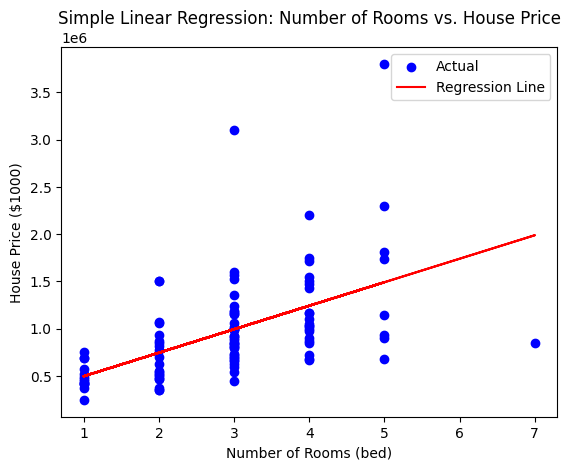

In [20]:
# Plot the actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Number of Rooms (bed)')
plt.ylabel('House Price ($1000)')
plt.title('Simple Linear Regression: Number of Rooms vs. House Price')
plt.legend()
plt.show()

In [21]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

Mean Squared Error: 217759409586.64462
R-squared score: 0.2560704825911375
